# 1.1 BFS Route Search & Automatic Text Generation

## BFS Route Search

In [114]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [14]:
connection_1 = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [11]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

In [18]:
import networkx as nx
%matplotlib inline

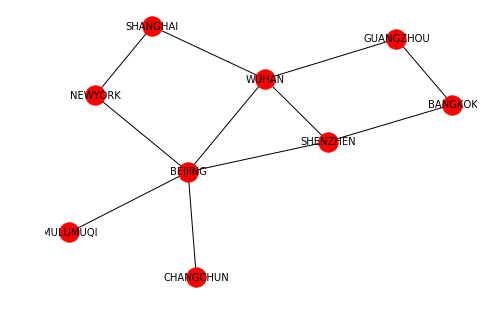

In [84]:
# nx.draw(nx.Graph(connection_1, node_shape='.', node_size=1500, font_size=10, with_labels=True)) 
g = nx.Graph()
for k, v_l in connection_1.items():
    for v in v_l:
        g.add_edge(k, v)
nx.draw(g, node_shape='.', node_size=1500, font_size=10, with_labels=True)

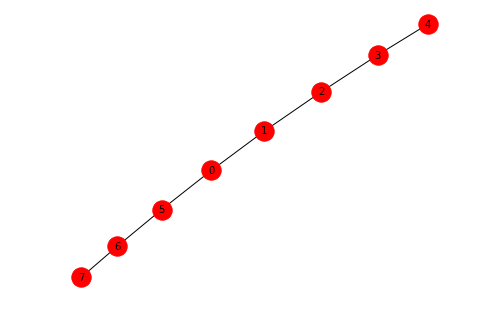

In [86]:
# nx.draw(nx.Graph(connection_2))
g = nx.Graph()
for k, v_l in connection_2.items():
    for v in v_l:
        g.add_edge(k, v)
nx.draw(g, node_shape='.', node_size=1500, font_size=10, with_labels=True)

In [141]:
def route_search_bfs(src, dst, graph):
    pathes = [[src]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        front_node = path[-1]
        if front_node in seen:
            continue
        next_node = graph[front_node]
#         print('standing on {} Looking forward {}'.format(front_node, next_node))
        if dst in next_node:
            path.append(dst)
            return path
        else:
            for s in next_node:
                pathes.append(path + [s])
        pathes.sort(key=len)
        seen.add(front_node)

In [142]:
def route_search_dfs(src, dst, graph):
    pathes = [[src]]
    seen = set()
    while pathes:
        path = pathes.pop(0)
        front_node = path[-1]
        if front_node in seen:
            continue
        next_node = graph[front_node]
#         print('standing on {} Looking forward {}'.format(front_node, next_node))
        if dst in next_node:
            path.append(dst)
            return path
        else:
            for s in next_node:
                pathes.insert(0, (path + [s]))
#         pathes.sort(key=len)
        seen.add(front_node)

In [144]:
def draw_route(rule, routes):
    if rule == 'BFS':
        print('BFS-based optimal route：%s' % ('->'.join(routes)))
    elif rule == 'DFS':
        print('DFS-based optimal route：%s' % ('->'.join(routes)))
    else:
        print('Error rule, please use BFS|DFS.')
    
draw_route(rule='DFS', routes=route_search_dfs(CHANGCHUN, BANGKOK, connection_1))
draw_route(rule='BFS', routes=route_search_bfs(CHANGCHUN, BANGKOK, connection_1))

DFS-based optimal route：CHANGCHUN->BEIJING->NEWYORK->SHANGHAI->WUHAN->GUANGZHOU->BANGKOK
BFS-based optimal route：CHANGCHUN->BEIJING->SHENZHEN->BANGKOK


## Automatic Text Generation

In [148]:
grammar1 = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [149]:
grammar2 = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [150]:
import random

In [154]:
def get_grammar(grammar_str, sep='=>'):
    grammar = dict()
    for line in grammar_str.split('\n'):
        line = line.strip()
        if not line:
            continue
        target, rule = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rule.split('|')]
    return grammar

In [155]:
def generate(grammar, target='sentence'):
    if target not in grammar:
        return target
    rule = random.choice(grammar[target])
    return ''.join(generate(grammar, target=r) for r in rule if r != 'null')

In [156]:
g = get_grammar(grammar2, sep='=>')
generate(g, target='sentence')

'这个好看的小小的好看的女人听着一个好看的好看的桌子'

In [160]:
g = get_grammar(grammar1, sep='=')
for i in range(30):
    print(generate(g, target='expression'))

6/9*6/3
1+1*9+8
2*3-2/3
1/8-2+4
3/1/0-6
4*3/3/7
5+5/79-24
2*9+1*0
0/8/0*4
07-04*07*5
4-3+4+2
9-1+1/5
5+1*2/2
29+6*4-7
9+8/8+5
8+2-0+4
4-1-4/21
0-8/2*0
5+6*9/7
2/2+3*83
55/2*8/4
85/0-1-9
8/1/7+2
54/9/1*3
3*3/6+8
3*5*3*7
62*2-4-9
4-5/3-6
4+8*8/2
55-0/0+3
